<a href="https://colab.research.google.com/github/rizkanj/Machine-Learning/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import and load dataset
data=pd.read_csv('drive/MyDrive/breast cancer/wdbc.data')
# Tambahkan header berdasarkan deskripsi di file wdbc.names (jika tersedia)
column_names = [
    'ID', 'Diagnosis',
    'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean',
    'Fractal_dimension_mean', 'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se',
    'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se',
    'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst',
    'Perimeter_worst', 'Area_worst', 'Smoothness_worst', 'Compactness_worst',
    'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst'
]

# Terapkan header ke DataFrame
data.columns = column_names

# Tampilkan 5 baris pertama
print(data.head())

         ID Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84348301         M        11.42         20.38           77.58      386.1   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   ...  Radius_worst  Texture_worst  Perimeter_worst  Area_wor

In [3]:
#drop ID column as it does not have a corrilation with dignosis which is what we want to classify
# Check if 'ID' column exists before dropping
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)
else:
    print("Column 'ID' not found in the DataFrame.")

#our data now has no missing values
data.isna().sum()

,0
Diagnosis,0
Radius_mean,0
Texture_mean,0
Perimeter_mean,0
Area_mean,0
Smoothness_mean,0
Compactness_mean,0
Concavity_mean,0
Concave_points_mean,0
Symmetry_mean,0


In [4]:
#Getting a statistical decription of our data
data.describe()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder and assign it to lbl_enc
lbl_enc = LabelEncoder()
# Now you can use lbl_enc to fit and transform your data
data['diagnosis_enc'] = lbl_enc.fit_transform(data[['Diagnosis']]) # Also corrected 'diagnosis' to 'Diagnosis'

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#The new column name diagnosis_enc icludes encoded column values from the diagnosis column
data.head()

,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,...,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst,diagnosis_enc
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


<Axes: >

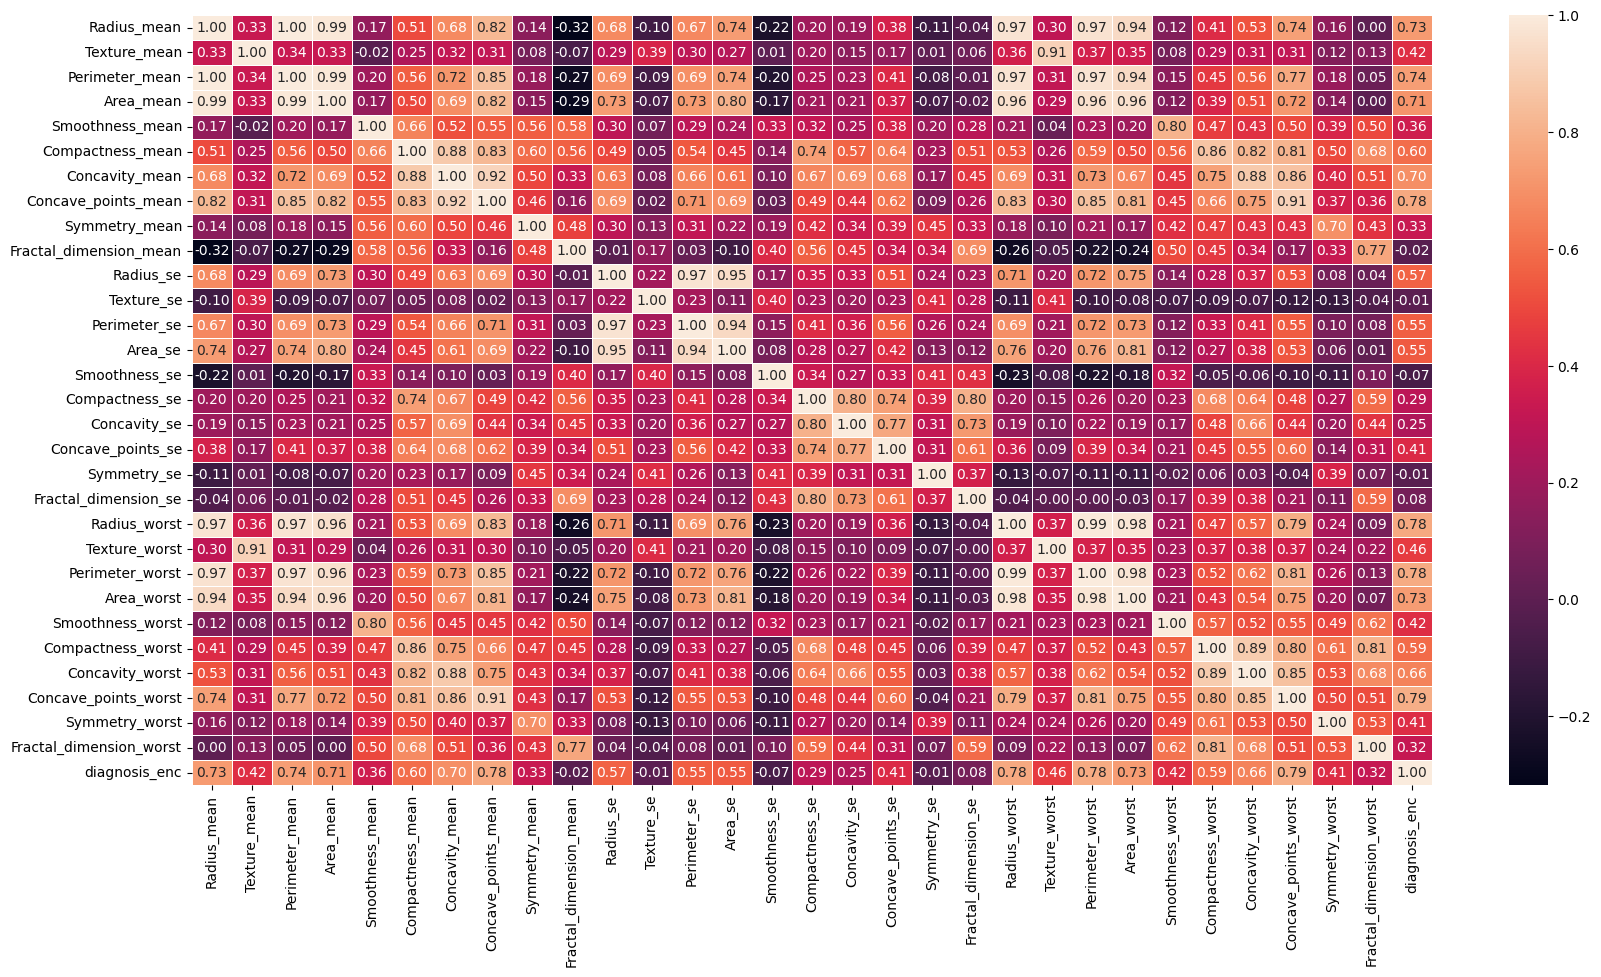

In [7]:
#Getting to view the corrilation on our data set
plt.figure(figsize=(20, 10))
# Calculate correlation only for numeric columns
sns.heatmap(data.select_dtypes(include=np.number).corr(),
            annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=.7)

In [8]:
# Get the correlation of all features with the target variable ('diagnosis_enc')
cor_target = data.select_dtypes(include=np.number).corr()['diagnosis_enc']

# Filter features with correlation greater than 0.5
strong_correlations = cor_target[cor_target > 0.5]

# Print or display the strongly correlated features
print(strong_correlations)

Radius_mean             0.729376
Perimeter_mean          0.741887
Area_mean               0.708389
Compactness_mean        0.595587
Concavity_mean          0.695648
Concave_points_mean     0.776369
Radius_se               0.565373
Perimeter_se            0.554416
Area_se                 0.546343
Radius_worst            0.775725
Perimeter_worst         0.782470
Area_worst              0.732925
Compactness_worst       0.589453
Concavity_worst         0.658348
Concave_points_worst    0.793181
diagnosis_enc           1.000000
Name: diagnosis_enc, dtype: float64


In [9]:
feature_cols = data[['Radius_mean', 'Perimeter_mean', 'Area_mean', 'Compactness_mean',
'Concavity_mean', 'Concave_points_mean', 'Radius_se', 'Perimeter_se', 'Area_se', 'Radius_worst',
'Perimeter_worst', 'Area_worst', 'Compactness_worst', 'Concave_points_worst', 'diagnosis_enc', 'Diagnosis']]

<Axes: >

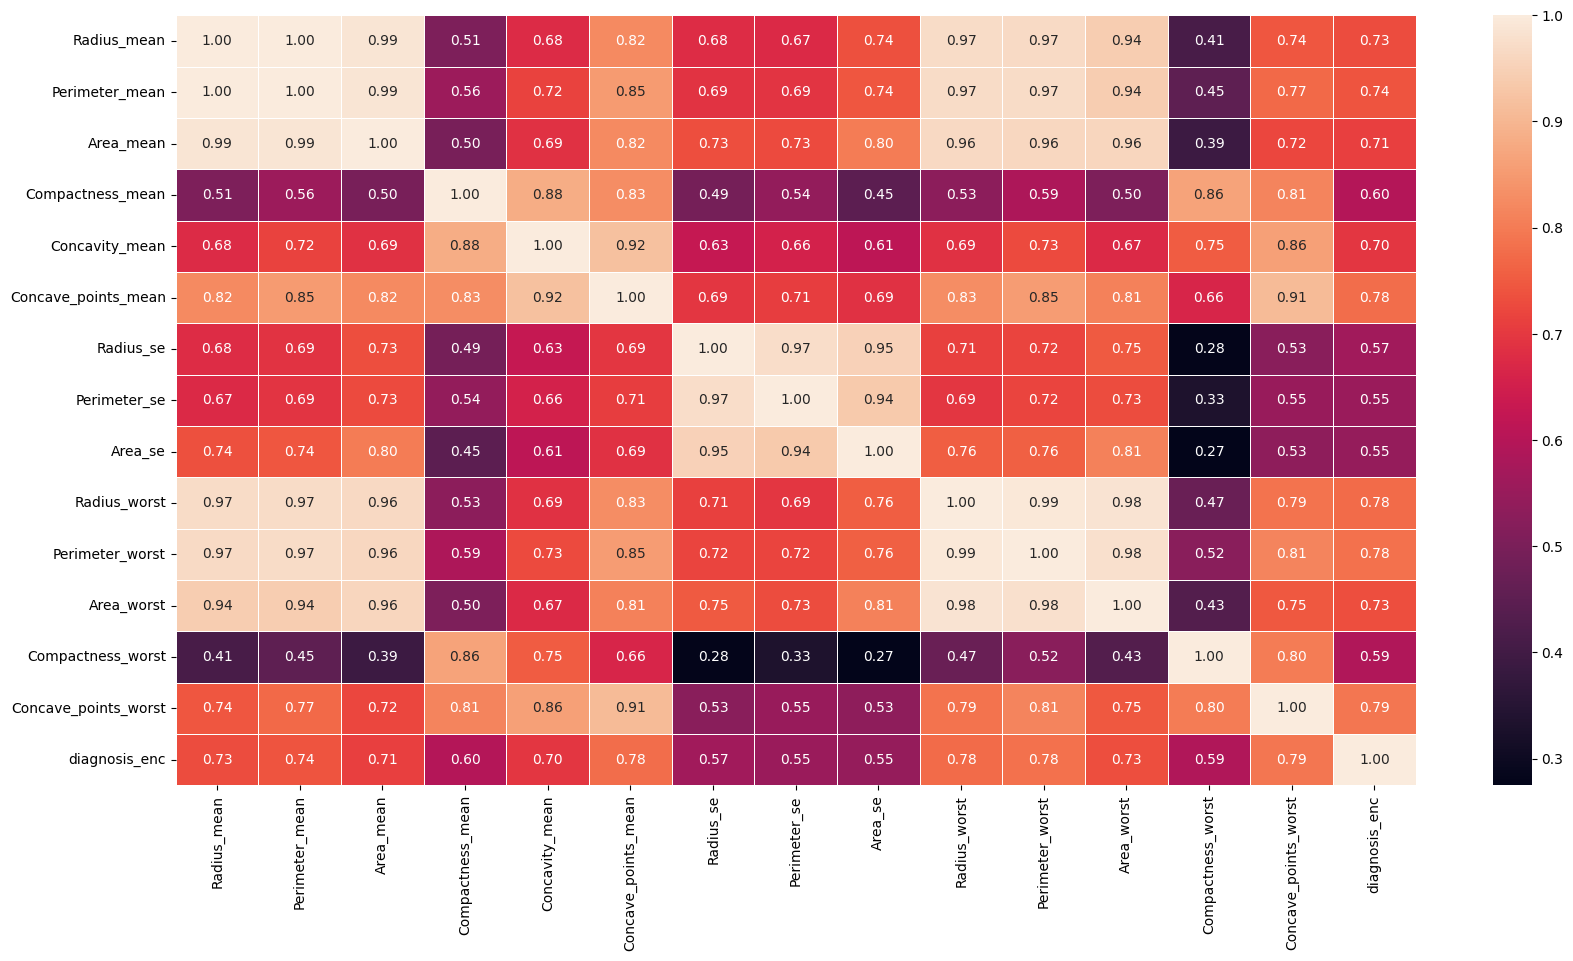

In [10]:
#in plotting the heatmap to see how the features corrilate to each other
plt.figure(figsize=(20,10))
# Exclude the 'Diagnosis' column, which contains strings, from the correlation calculation
sns.heatmap(feature_cols.select_dtypes(include=np.number).corr(),annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=.7)

In [11]:
#get to view our our diagnosis column values are distributed
data.Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,211


<Axes: >

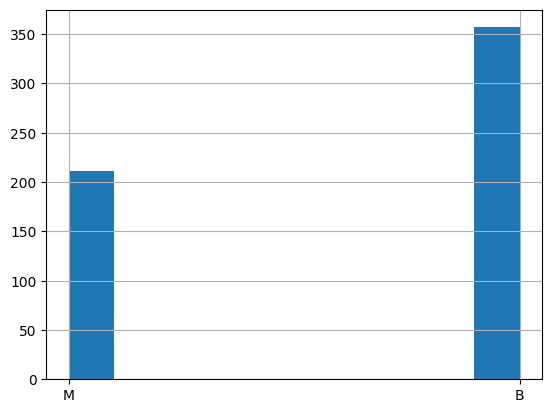

In [12]:
#plotting the distribution on an histogram
data.Diagnosis.hist()

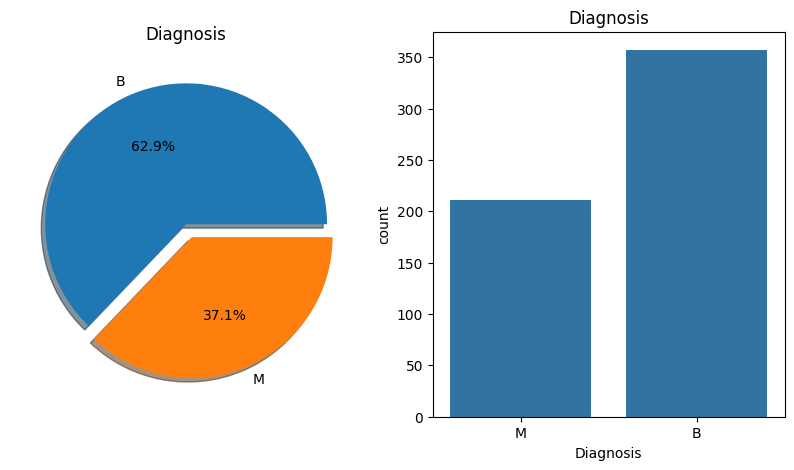

In [13]:
#plotting subplots of our target column
f,ax=plt.subplots(1,2, figsize=(10,5))
data['Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Diagnosis')
ax[0].set_ylabel('')
#The x argument should be specified as a keyword argument
sns.countplot(x='Diagnosis',data=data,ax=ax[1])
ax[1].set_title('Diagnosis')
plt.show()

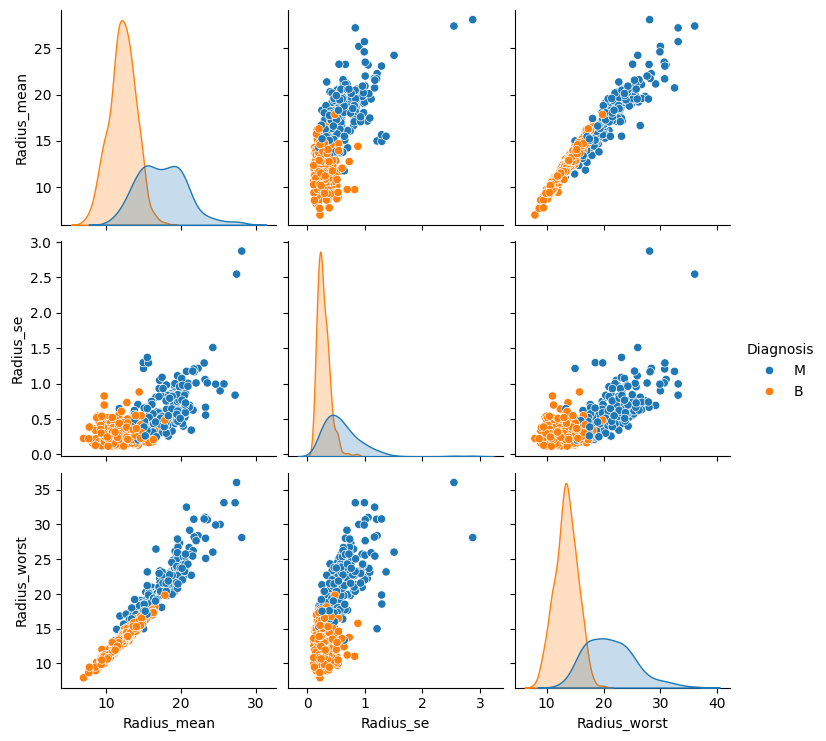

In [14]:
#plotting radius features of the cell in relation to the diagnosis type
sns.pairplot(feature_cols[['Radius_mean','Radius_se','Radius_worst', 'Diagnosis']],hue='Diagnosis')

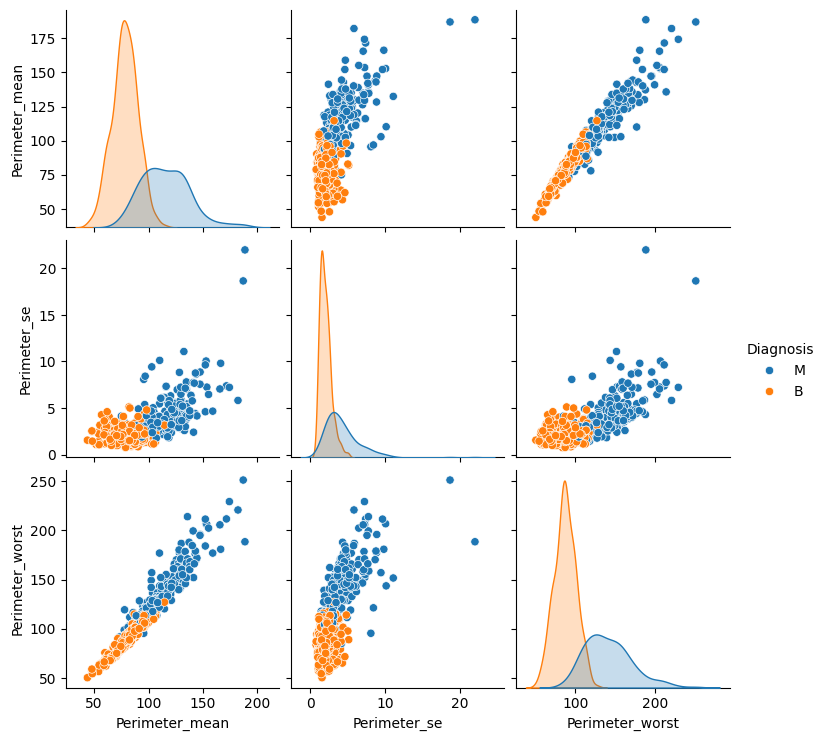

In [15]:
#features related to perimeter in relation to the diagnosis type
sns.pairplot(feature_cols[['Perimeter_mean', 'Perimeter_se','Perimeter_worst', 'Diagnosis']],hue='Diagnosis')

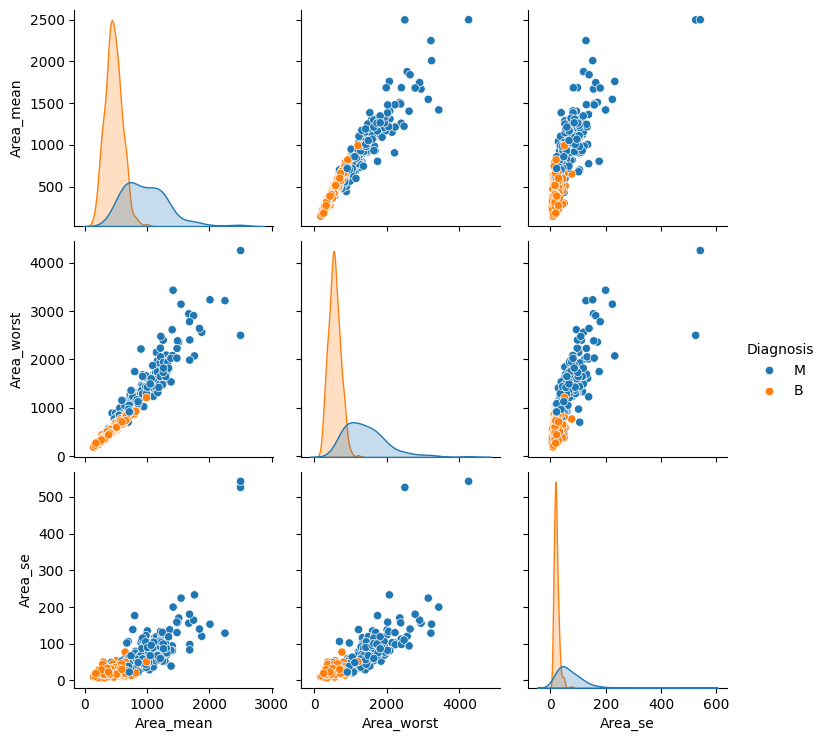

In [16]:
#features related to area in relation to the diagnosis type
sns.pairplot(feature_cols[['Area_mean', 'Area_worst', 'Area_se', 'Diagnosis']], hue='Diagnosis') # Corrected column names

In [17]:
#Split Data

# Mendefinisikan variabel fitur (X) dan variabel target (y)
X = data.drop(['Diagnosis', 'diagnosis_enc'], axis=1)  # Drop 'Diagnosis' dan 'diagnosis_enc' dari fitur
y = data['diagnosis_enc']  # Target variabel yang sudah dienkode

# Membagi data menjadi data pelatihan dan data pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengecek dimensi dari data setelah pemisahan
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (454, 30)
Test set size: (114, 30)


In [18]:
# Train and Evaluate Models

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Latih model dengan data training

# Prediksi dengan data testing
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred_dt = dt_model.predict(X_test)

# Evaluasi Decision Tree
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred_knn = knn_model.predict(X_test)

# Evaluasi KNN
print("\nK-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Random Forest Classifier:
Accuracy: 0.97
Confusion Matrix:
[[68  0]
 [ 3 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Classifier:
Accuracy: 0.92
Confusion Matrix:
[[64  4]
 [ 5 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.91      0.89      0.90        46

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114


K-Nearest Neighbors Classifier:
Accuracy: 0.92
Confusion Matrix:
[[65  3]
 [ 6 40]]
Classification Report:
              precision    recall  

In [19]:
# Hyperparameter Tuning untuk Random Forest, Decision Tree, dan KNN

# Definisi parameter grid untuk setiap model
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam Random Forest
    'max_depth': [None, 10, 20],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10]  # Minimum sampel untuk split node
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Fungsi pemisahan
    'max_depth': [None, 10, 20],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10]  # Minimum sampel untuk split node
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Jumlah tetangga KNN
    'weights': ['uniform', 'distance'],  # Bobot jarak
    'metric': ['euclidean', 'manhattan']  # Metode perhitungan jarak
}

# List model dan parameter grid
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'KNN': (KNeighborsClassifier(), param_grid_knn)
}

best_models = {}  # Menyimpan model terbaik

# Loop untuk melakukan tuning pada setiap model
for model_name, (model, param_grid) in models.items():
    print(f"\nTuning {model_name}...\n")

    # GridSearchCV dengan 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Simpan model terbaik
    best_models[model_name] = grid_search.best_estimator_

    # Evaluasi model terbaik
    y_pred = grid_search.best_estimator_.predict(X_test)

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Accuracy on Training Set: {grid_search.best_score_:.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Tuning Random Forest...

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy on Training Set: 0.9559
Test Accuracy: 0.9649
Confusion Matrix:
[[67  1]
 [ 3 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Tuning Decision Tree...

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Accuracy on Training Set: 0.9295
Test Accuracy: 0.9211
Confusion Matrix:
[[64  4]
 [ 5 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.91      0.89      0.90        46

    accuracy     


Evaluasi dengan Cross-Validation:
Random Forest: 0.9559 ± 0.0209
Decision Tree: 0.9295 ± 0.0345
KNN: 0.9383 ± 0.0150

Feature Importance dari Random Forest:
                 Feature  Importance
23            Area_worst    0.167269
27  Concave_points_worst    0.152093
22       Perimeter_worst    0.100140
2         Perimeter_mean    0.085445
20          Radius_worst    0.074487
7    Concave_points_mean    0.072702
6         Concavity_mean    0.061028
3              Area_mean    0.044326
0            Radius_mean    0.040340
26       Concavity_worst    0.034455


<ipython-input-23-93234e650f29>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'][:10], y=feature_importance_df['Feature'][:10], palette='coolwarm')


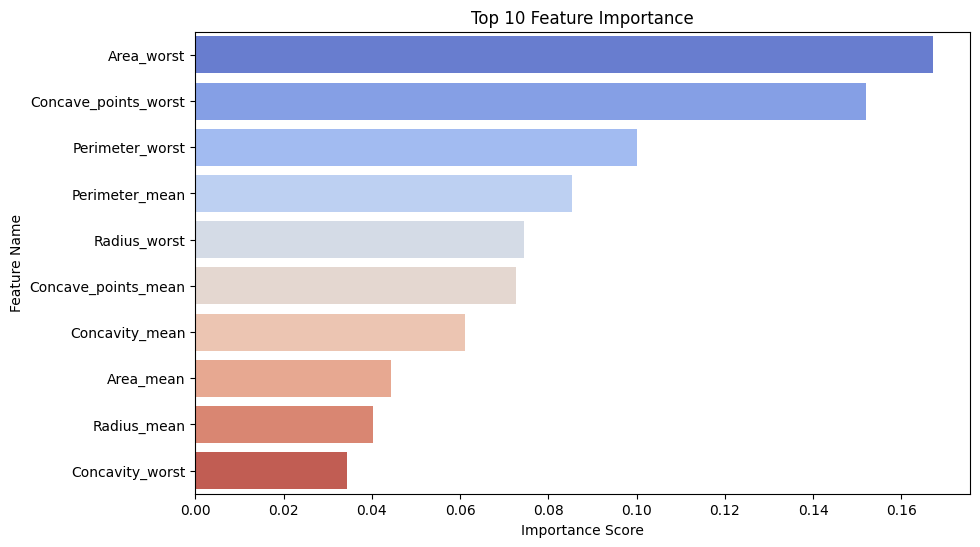

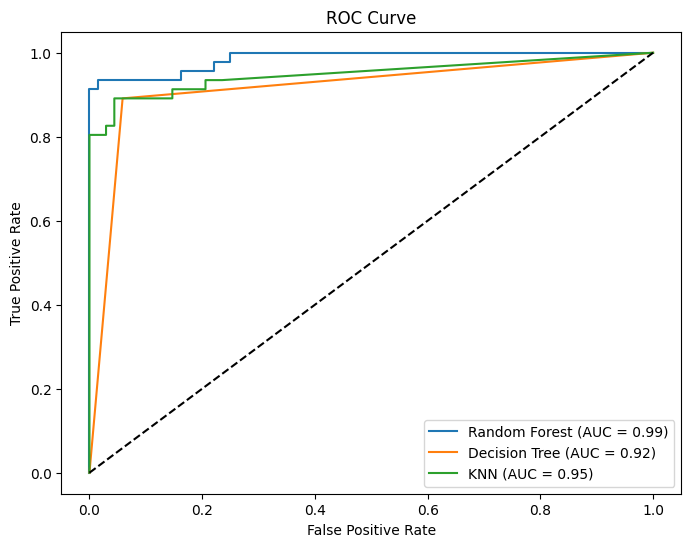


Model terbaik telah disimpan!


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cross-Validation dengan Model Terbaik
print("\nEvaluasi dengan Cross-Validation:")
for model_name, best_model in best_models.items():
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Feature Importance (Hanya untuk Random Forest & Decision Tree)
if 'Random Forest' in best_models:
    importances = best_models['Random Forest'].feature_importances_
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importance dari Random Forest:")
    print(feature_importance_df.head(10))

    # Plotting
    plt.figure(figsize=(10,6))
    sns.barplot(x=feature_importance_df['Importance'][:10], y=feature_importance_df['Feature'][:10], palette='coolwarm')
    plt.title('Top 10 Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature Name')
    plt.show()

# ROC Curve & AUC Score
plt.figure(figsize=(8,6))
for model_name, best_model in best_models.items():
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0,1], [0,1], 'k--')  # Garis diagonal sebagai baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Simpan Model Terbaik
joblib.dump(best_models['Random Forest'], 'best_random_forest.pkl')
joblib.dump(best_models['Decision Tree'], 'best_decision_tree.pkl')
joblib.dump(best_models['KNN'], 'best_knn.pkl')

print("\nModel terbaik telah disimpan!")


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.91      0.89      0.90        46

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114


Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.93      0.85      0.89        46

    accuracy                           0.91       114
   macro avg      

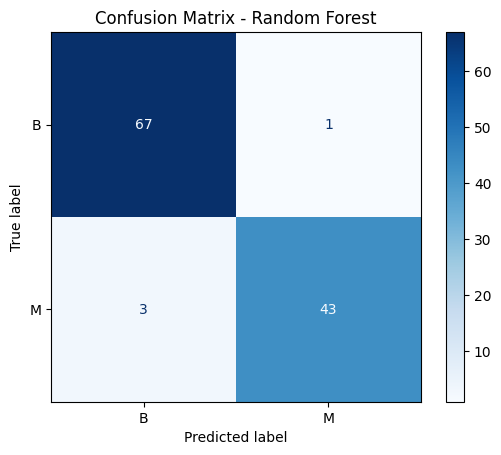


Model: Decision Tree
False Positives: [5 4]
False Negatives: [4 5]


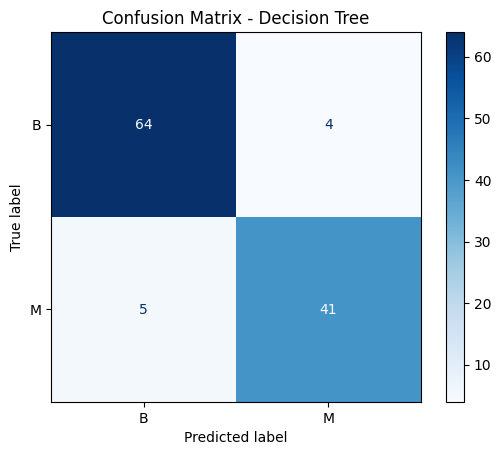


Model: KNN
False Positives: [7 3]
False Negatives: [3 7]


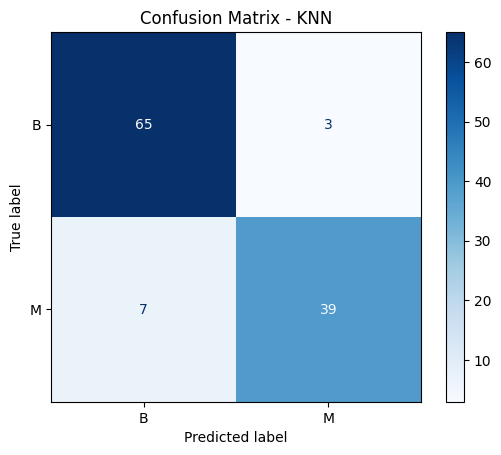

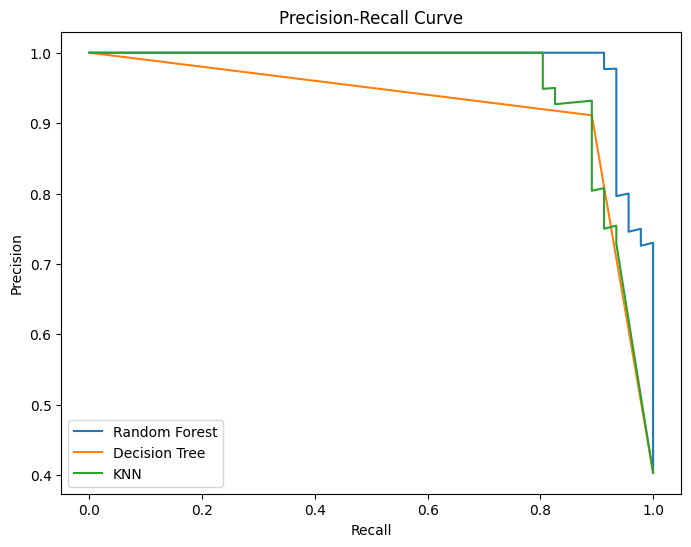

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Menampilkan Classification Reports
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y_test, y_pred))

# Analisis False Positives & False Negatives
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    FP = cm.sum(axis=0) - np.diag(cm)  # False Positives per kelas
    FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives per kelas

    print(f"\nModel: {model_name}")
    print(f"False Positives: {FP}")
    print(f"False Negatives: {FN}")

    # Visualisasi Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbl_enc.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8,6))
for model_name, best_model in best_models.items():
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{model_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()